#Task 1:
This dataset includes scores from three test scores of students at a (fictional) public school and a variety of personal and socio-economic factors that may have interaction effects upon them.
Column description:
1.  `Gender`: Gender of the student (male/female)
2.  `EthnicGroup`: Ethnic group of the student (group A to E)
3.  `ParentEduc`: Parent(s) education background (from some_highschool to master's degree)
4.  `LunchType`: School lunch type (standard or free/reduced)
5.  `TestPrep`: Test preparation course followed (completed or none)
6.  `ParentMaritalStatus`: Parent(s) marital status (married/single/widowed/divorced)
7.  `PracticeSport`: How often the student parctice sport (never/sometimes/regularly))
8.  `IsFirstChild`: If the child is first child in the family or not (yes/no)
9.  `NrSiblings`: Number of siblings the student has (0 to 7)
10. `TransportMeans`: Means of transport to school (schoolbus/private)
11. `WklyStudyHours`: Weekly self-study hours(less that 5hrs; between 5 and 10hrs; more than 10hrs)
12. `MathScore`: math test score(0-100)
13. `ReadingScore`: reading test score(0-100)
13. `WritingScore`: writing test score(0-100)

#Download the dataset
Run the cell below

In [153]:
!gdown 1La5PlbYWPH1VyiE8Zq2BDAYWqtpd56Z2

Downloading...
From: https://drive.google.com/uc?id=1La5PlbYWPH1VyiE8Zq2BDAYWqtpd56Z2
To: /content/Expanded_data_with_more_features.csv
100% 2.91M/2.91M [00:00<00:00, 124MB/s]


In [154]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Read the dataset

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [156]:
df=pd.read_csv('/content/Expanded_data_with_more_features.csv')

In [157]:
df

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


In [158]:
df = df.drop('Unnamed: 0', axis=1)
df

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


In [159]:
missing_values=df.isnull().sum()

In [160]:
percent_missing=missing_values/len(df)*100

In [161]:
percent_missing

Gender                  0.000000
EthnicGroup             6.005026
ParentEduc              6.021344
LunchType               0.000000
TestPrep                5.972390
ParentMaritalStatus     3.883685
PracticeSport           2.059332
IsFirstChild            2.950295
NrSiblings              5.130381
TransportMeans         10.228126
WklyStudyHours          3.116739
MathScore               0.000000
ReadingScore            0.000000
WritingScore            0.000000
dtype: float64

In [162]:
df.columns

Index(['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
       'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings',
       'TransportMeans', 'WklyStudyHours', 'MathScore', 'ReadingScore',
       'WritingScore'],
      dtype='object')

In [163]:
columns_with_missing_values=df.columns[df.isnull().any()]
print(f'Number of columns with missing values: {len(columns_with_missing_values)}')

Number of columns with missing values: 9


In [164]:
non_null_values=df['TestPrep'].dropna().unique()
non_null_values

array(['none', 'completed'], dtype=object)

#Visualization

In [165]:
master_degree=df[df['ParentEduc']=="master's degree"]
highschool_degree=df[df['ParentEduc']=="high school"]

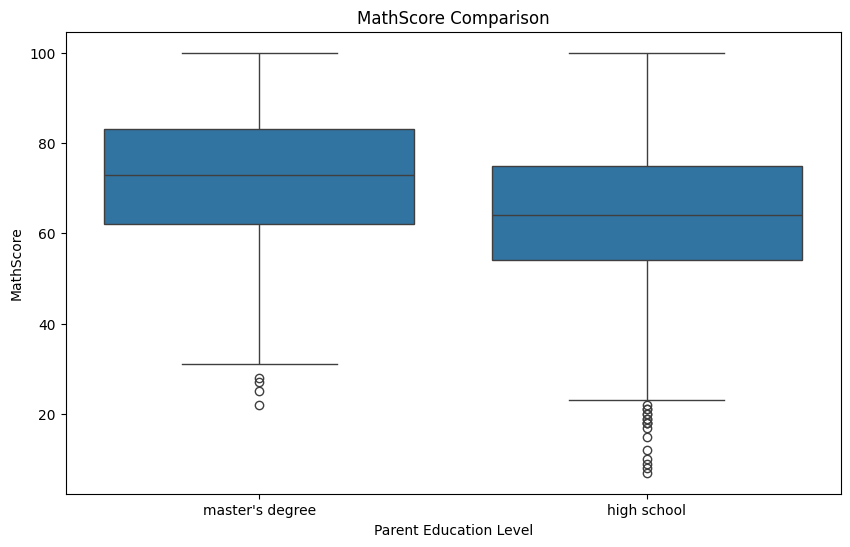

In [166]:
plt.figure(figsize=(10,6))
sns.boxplot(x='ParentEduc',y='MathScore',data=pd.concat([master_degree,highschool_degree]))
plt.title('MathScore Comparison')
plt.xlabel('Parent Education Level')
plt.ylabel('MathScore')
plt.show()

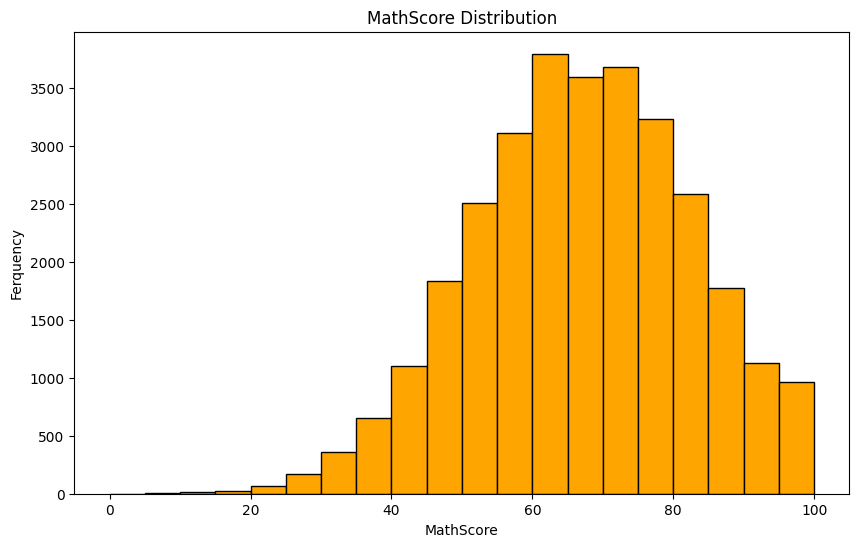

In [167]:
plt.figure(figsize=(10,6))
plt.hist(df['MathScore'], bins=20, color='orange', edgecolor='black')
plt.title('MathScore Distribution')
plt.xlabel('MathScore')
plt.ylabel('Ferquency')
plt.show()

#Missing Values & Textual data

<Axes: >

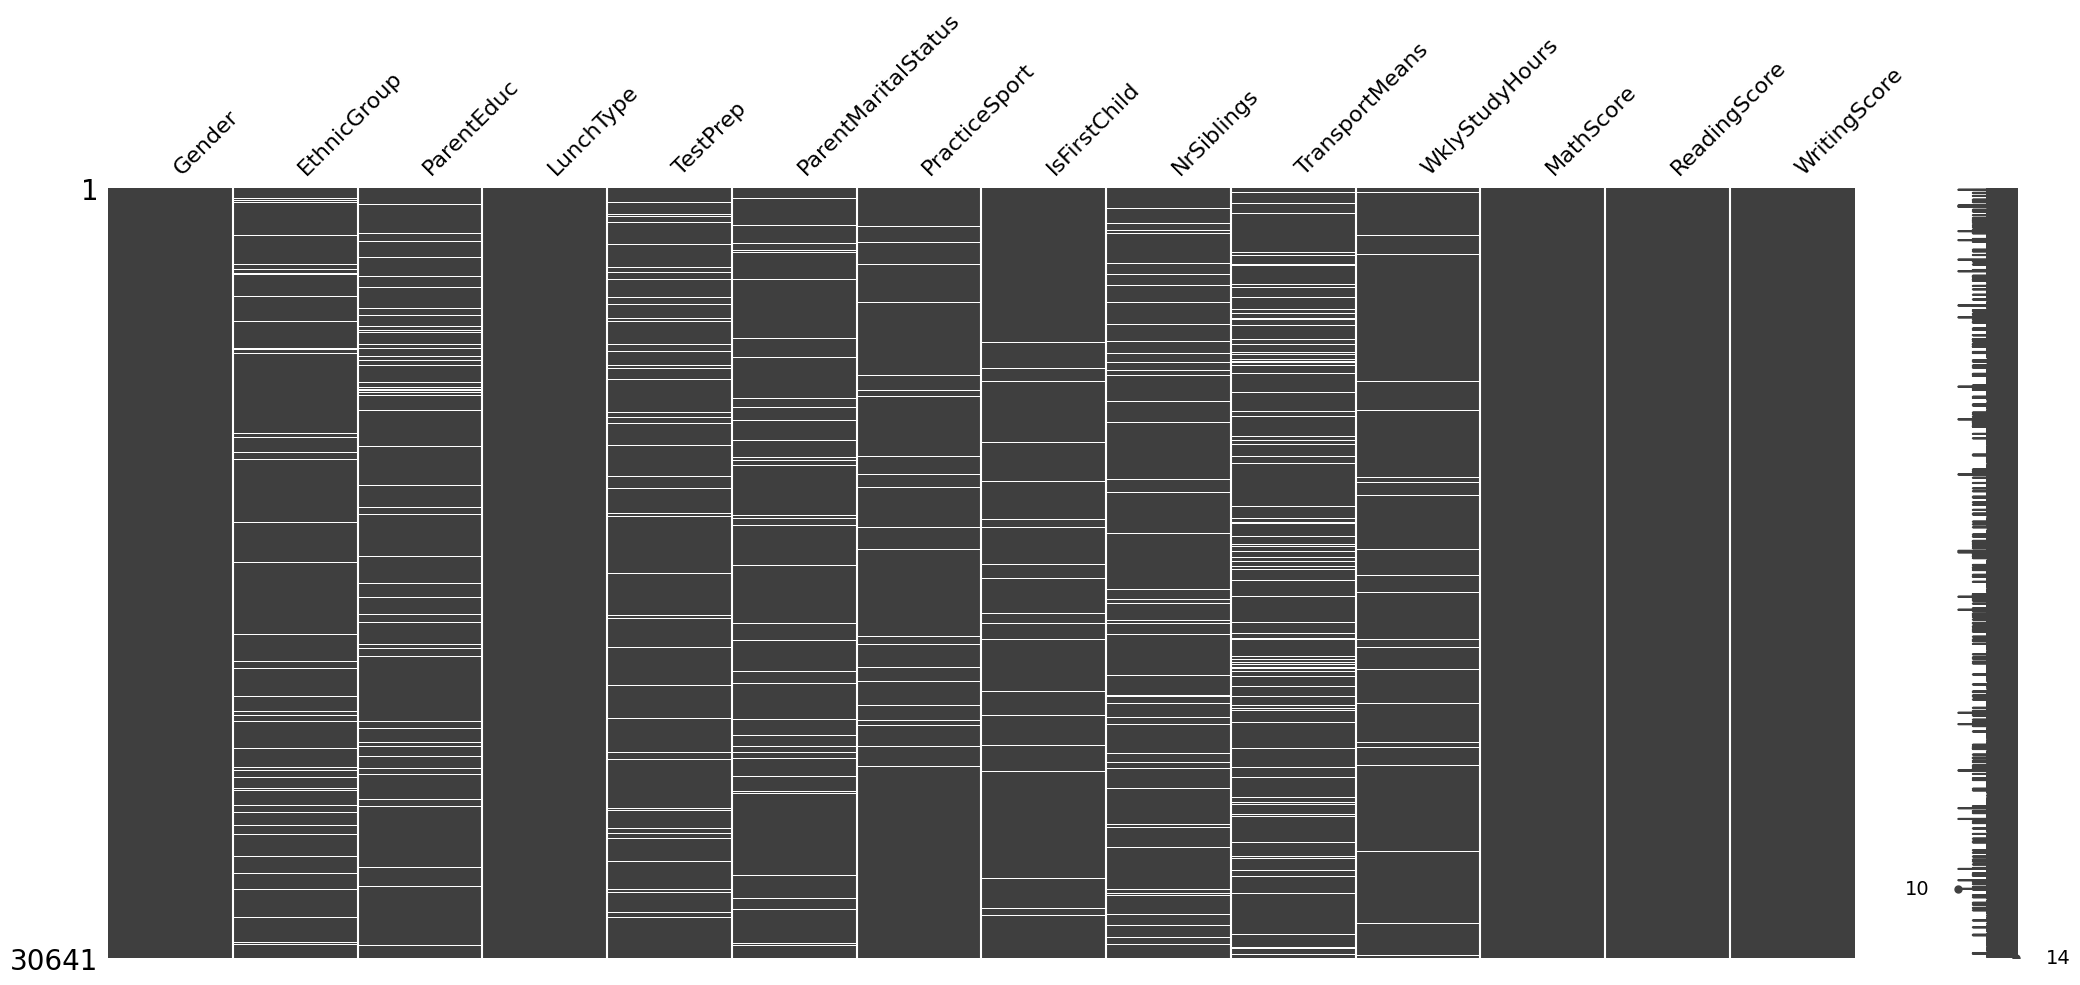

In [168]:
msno.matrix(df)

In [169]:
numeric_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

In [170]:
numeric_cols = df.select_dtypes(include='number').columns
categorical_cols = df.select_dtypes(exclude='number').columns

In [171]:
df[numeric_cols] = numeric_imputer.fit_transform(df[numeric_cols])
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])

In [172]:
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'
)

#Train - test split of the dataset (80:20 ratio)

In [173]:
X = df.drop(['MathScore', 'ReadingScore', 'WritingScore'], axis=1)
y = df[['MathScore', 'ReadingScore', 'WritingScore']]

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [175]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (24512, 11)
y_train shape: (24512, 3)
X_test shape: (6129, 11)
y_test shape: (6129, 3)


#Model training (Use KNN, Logistic regression or Linear regression)

In [182]:
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor(n_neighbors=5))  # You can adjust the number of neighbors as needed
])

In [183]:
knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot', OneHotEncoder(),
                                                  Index(['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
       'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild',
       'TransportMeans', 'WklyStudyHours'],
      dtype='object'))])),
                ('regressor', KNeighborsRegressor())])

#Model evaluation

In [184]:
mse = knn_pipeline.score(X_test, y_test)

In [185]:
print(f'MSE: {mse}')

MSE: 0.1246022068674234
